In [3]:
import numpy as np
import matplotlib.pyplot as plt

## En esta primera aproximación vamos a tomar el perfil de Hernquist 

## a = +(GM)/(r+b)^2      Siendo b una escala característicaaa

In [4]:
'''
Los propósitos de este código son calcular y graficar la dependencia de las diferentes formas funcionales de mu 
respecto al radio y, calcular y graficar las aceleraciones newtoniana y mondianas para un bulbo galáctico, por lo 
tanto, el perfil de potencial que será utilizado es el de Hernquist.
'''

'\nLos propósitos de este código son calcular y graficar la dependencia de las diferentes formas funcionales de mu \nrespecto al radio y, calcular y graficar las aceleraciones newtoniana y mondianas para un bulbo galáctico, por lo \ntanto, el perfil de potencial que será utilizado es el de Hernquist.\n'

In [5]:
## Veamos cuáles son las formas funcionales de mu

## Expansión de Taylor

## mu(a) = mu_0 + mu_1 a


## RAR

## nu(a) = 1/(1 - exp(-sqrt(a/a_0)))   Siendo a_0 una constante


## SIMPLE

## mu(a) = (1/2)(1 + sqrt(1 + 4/(a/a_0)))) 


## STANDARD

## mu(a) = sqrt((1/2)(1 + sqrt(1 + 4/(a/a_0)^2)))


In [42]:
## Creamos el vector r [1 kpc], desde 0 hasta 10 con paso de 0.1

r = np.arange(0.0,20.1, 0.01)

## Definamos las constantes

M = 1.0 ## 10^10 masas solares. Masa del bulbo de la Vía Láctea

G = 430007.1

a_0 = 4679.4 ## [kpc/Gyr^2]  

b = 2.0 ## escala característica del bulbo

## Definimos la aceleración Newtoniana de acuerdo al modelo de Hernquist

def a_N(r):
    a_N = (G*M)/((r+b)*(r+b))  ## Aceleración Newtoniana con el perfil de Hernquist
    return a_N

In [43]:
## Tomaremos la velocidad circular Newtoniana como v^2 = ra
## Tomaremos la velocidad circular Mondiana como v^2_mu = mura = muv^2

Text(0.5, 1.0, 'Formas funcionales $\\mu$(a)')

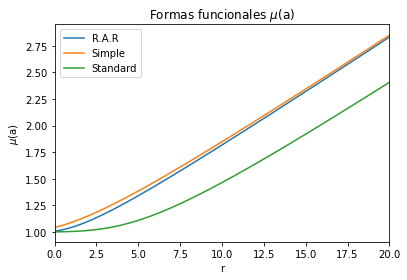

In [44]:
## Grafiquemos las diferentes formas funcionales de mu para el perfil de Hernquist

## Taylor: mu(a_N) = mu_0 + mu_1 a_N
## Por simplicidad tomaremos mu_0 = mu_1 = 1 

def mu_T(r, a_N):
    mu_0 = 1.0
    mu_1 = 1.0
    mu_T = mu_0 + mu_1 * a_N
    return mu_T

## R.A.R.: mu(a_N) = (1- exp(-sqrt(a_N/a_0)))^-1

def mu_R(r, a_N):
    mu_R = 1/(1 - np.exp(-np.sqrt(a_N/a_0)))
    return mu_R

## Simple: mu(a_N) = 0.5(1 + sqrt(1 + 4/(a_N/a_0)))

def mu_S (r, a_N):
    mu_S = 0.5*(1 + np.sqrt(1 + 4*a_0/a_N))
    return mu_S

## Standard: mu(a_N) = sqrt(0.5(1+sqrt(1 + (2/(a_N/a_0))^2)))

def mu_Sd(r, a_N):
    mu_Sd = np.sqrt(0.5*(1 +np.sqrt(1 + 4*a_0*a_0/(a_N*a_N))))
    return mu_Sd
    
#plt.plot(r, mu_T(r, a_N(r)), label='Taylor')
plt.plot(r, mu_R(r, a_N(r)), label='R.A.R')
plt.plot(r, mu_S(r, a_N(r)), label='Simple')
plt.plot(r, mu_Sd(r, a_N(r)), label='Standard')
plt.legend()
plt.xlim(0,20) ## Siendo 25 el diámetro del disco de la galaxia
#plt.ylim(1.3, 3.7)
plt.xlabel('r')
plt.ylabel('$\mu$(a)')
plt.title('Formas funcionales $\mu$(a)')

Text(0.5, 1.0, 'Formas funcionales $\\mu$(a)')

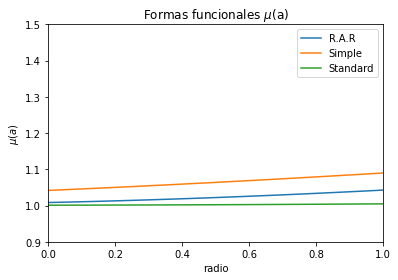

In [46]:
plt.plot(r, mu_R(r, a_N(r)), label='R.A.R')
plt.plot(r, mu_S(r, a_N(r)), label='Simple')
plt.plot(r, mu_Sd(r, a_N(r)), label='Standard')
plt.legend()
plt.xlim(0,1) ## Siendo 25 el diámetro del disco de la galaxia
plt.ylim(0.9, 1.5)
plt.xlabel('radio')
plt.ylabel('$\mu (a)$')
plt.title('Formas funcionales $\mu$(a)')

Text(0.5, 1.0, 'Formas funcionales $\\mu$(a)')

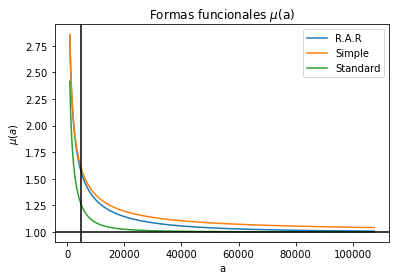

In [47]:
plt.plot(a_N(r), mu_R(r, a_N(r)), label='R.A.R')
plt.plot(a_N(r), mu_S(r, a_N(r)), label='Simple')
plt.plot(a_N(r), mu_Sd(r, a_N(r)), label='Standard')
plt.legend()
plt.axvline(4679.4, color='black')
plt.axhline(1.0, color='black')
#plt.xlim(0,20) ## Siendo 25 el diámetro del disco de la galaxia
#plt.ylim(1.0, 4.0)
plt.xlabel('a')
plt.ylabel('$\mu (a)$')
plt.title('Formas funcionales $\mu$(a)')

Text(0.5, 1.0, 'Velocidad Circular Newtoniana [km/s] respecto al radio')

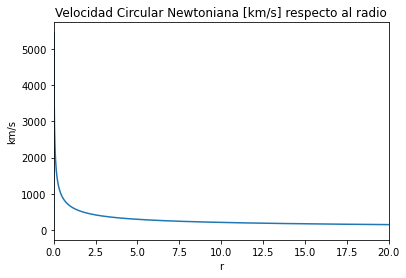

In [41]:
## Velocidad Circular Newtoniana

def v_N(r):
    v_N = np.sqrt(r*G*M)/(r+b) 
    return v_N

plt.plot(r, v_N(r))
plt.xlim(0, 20)
plt.xlabel('r')
plt.ylabel('km/s')
plt.title('Velocidad Circular Newtoniana [km/s] respecto al radio')

Text(0.5, 1.0, 'Velocidad Circular Mondiana, Taylor [km/s] respecto al radio')

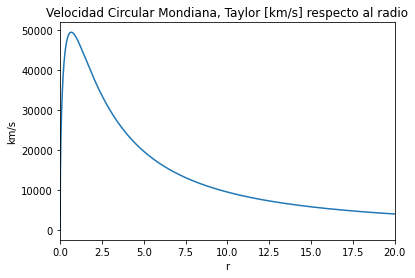

In [10]:
## Velocidad Circular Mondiana: Taylor

## Usaremos v'^2_c = ra_N mu

v_T = np.sqrt(mu_T(r, a_N(r)))*v_N(r)

plt.plot(r, v_T)
plt.xlim(0, 20)
plt.xlabel('r')
plt.ylabel('km/s')
plt.title('Velocidad Circular Mondiana, Taylor [km/s] respecto al radio')

Text(0.5, 1.0, 'Velocidad Circular Mondiana, R.A.R. [km/s] respecto al radio')

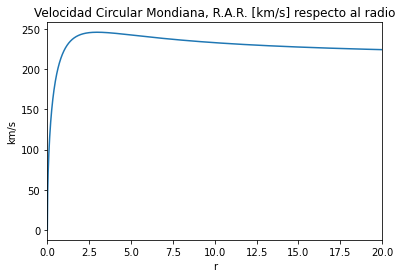

In [11]:
## Velocidad Circular Mondiana: RAR

## Usaremos v'^2_c = ra_N mu

v_R = np.sqrt(mu_R(r, a_N(r)))*v_N(r)

plt.plot(r, v_R)
plt.xlim(0, 20)
plt.xlabel('r')
plt.ylabel('km/s')
plt.title('Velocidad Circular Mondiana, R.A.R. [km/s] respecto al radio')

Text(0.5, 1.0, 'Velocidad Circular Mondiana, Simple [km/s] respecto al radio')

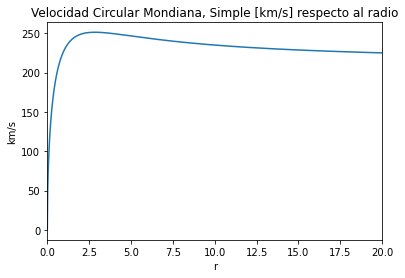

In [12]:
## Velocidad Circular Mondiana: Simple

## Usaremos v'^2_c = ra_N mu

v_S = np.sqrt(mu_S(r, a_N(r)))*v_N(r)


plt.plot(r, v_S)
plt.xlim(0, 20)
plt.xlabel('r')
plt.ylabel('km/s')
plt.title('Velocidad Circular Mondiana, Simple [km/s] respecto al radio')

Text(0.5, 1.0, 'Velocidad Circular Mondiana, Standard [km/s] respecto al radio')

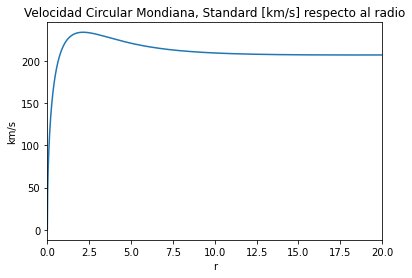

In [13]:
## Velocidad Circular Mondiana: Standard

## Usaremos v'^2_c = ra_N mu

v_Sd = np.sqrt(mu_Sd(r, a_N(r)))*v_N(r)


plt.plot(r, v_Sd)
plt.xlim(0, 20)
plt.xlabel('r')
plt.ylabel('km/s')
plt.title('Velocidad Circular Mondiana, Standard [km/s] respecto al radio')

Text(0.5, 1.0, 'Velocidad Circular [km/s] respecto al radio')

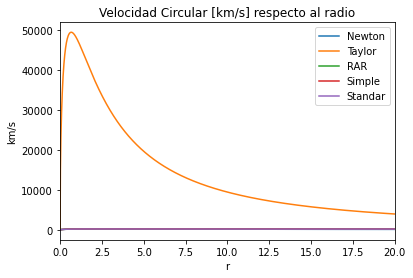

In [14]:
## Ploteamos 

plt.plot(r, v_N(r), label='Newton')
plt.plot(r, v_T, label='Taylor')
plt.plot(r, v_R, label='RAR')
plt.plot(r, v_S, label='Simple')
plt.plot(r, v_Sd, label='Standar')
plt.xlim(0, 20)
#plt.ylim(0,200)
plt.legend()
plt.xlabel('r')
plt.ylabel('km/s')
plt.title('Velocidad Circular [km/s] respecto al radio')

Text(0.5, 1.0, 'Velocidad Circular [km/s] respecto al radio')

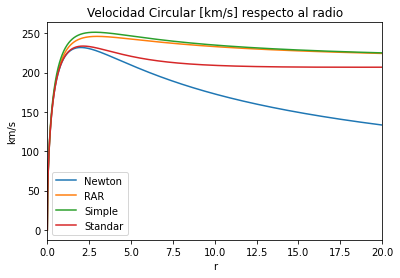

In [15]:
## Como vemos, Taylor tiene un compartamiento muy diferente al resto de las curvas, por lo que lo podemos despreciar

plt.plot(r, v_N(r), label='Newton')
plt.plot(r, v_R, label='RAR')
plt.plot(r, v_S, label='Simple')
plt.plot(r, v_Sd, label='Standar')
plt.xlim(0, 20)
#plt.ylim(50,170)
plt.legend()
plt.xlabel('r')
plt.ylabel('km/s')
plt.title('Velocidad Circular [km/s] respecto al radio')

In [61]:
r_prima = np.arange(-30, 20, 1)

b = 9.58

a_N_prima = a_N(r_prima)

a_N_prima

array([1.03125045e+03, 1.14018986e+03, 1.26734943e+03, 1.41703091e+03,
       1.59488481e+03, 1.80845155e+03, 2.06797415e+03, 2.38764961e+03,
       2.78761270e+03, 3.29718578e+03, 3.96041037e+03, 4.84589300e+03,
       6.06528822e+03, 7.81030180e+03, 1.04329126e+04, 1.46378419e+04,
       2.20105598e+04, 3.67640556e+04, 7.34251588e+04, 2.13254860e+05,
       2.43768197e+06, 1.27826130e+06, 1.72250881e+05, 6.46005498e+04,
       3.35513171e+04, 2.04995662e+04, 1.38104309e+04, 9.93170564e+03,
       7.48405922e+03, 5.84118620e+03, 4.68537772e+03, 3.84153055e+03,
       3.20670130e+03, 2.71715457e+03, 2.33171833e+03, 2.02283555e+03,
       1.77149822e+03, 1.56425148e+03, 1.39135478e+03, 1.24561608e+03,
       1.12163164e+03, 1.01527779e+03, 9.23363591e+02, 8.43388648e+02,
       7.73371253e+02, 7.11724424e+02, 6.57165183e+02, 6.08647263e+02,
       5.65310566e+02, 5.26442784e+02])

In [62]:
mu_RAR_prima = mu_R(r_prima, a_N_prima)
mu_S_prima = mu_S(r_prima, a_N_prima)
mu_Sd_prima = mu_Sd(r_prima, a_N_prima)

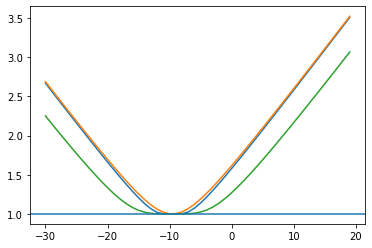

In [68]:
plt.plot(r_prima, mu_RAR_prima)
plt.plot(r_prima, mu_S_prima)
plt.plot(r_prima, mu_Sd_prima)
plt.axhline(1.0)

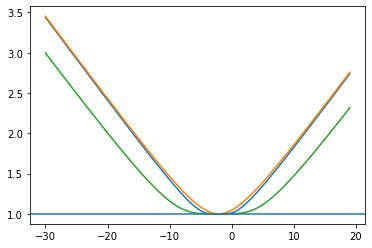

In [78]:
b = 2.1

a_N_prima = a_N(r_prima)

a_N_prima

mu_RAR_prima = mu_R(r_prima, a_N_prima)
mu_S_prima = mu_S(r_prima, a_N_prima)
mu_Sd_prima = mu_Sd(r_prima, a_N_prima)

plt.plot(r_prima, mu_RAR_prima)
plt.plot(r_prima, mu_S_prima)
plt.plot(r_prima, mu_Sd_prima)
plt.axhline(1.0)